<a href="https://colab.research.google.com/github/jsong0727/PO0/blob/main/Team_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2020 Tokyo Olympics
We'll dive deep into a dataset all about 2020 Tokyo Olympics. From the dataset we will find out some fun facts about this event.

<ul type="square">
<li>No. of athletes per country （做成地图）
<li>各国分性别获得奖牌占比
<li>哪项运动参加的人数最多
<li>哪个大类下的项目数最多

**Data Source**

[Link](https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo) This dataset contains the details of the Athletes, Coaches, Teams participating as well as the Entries by gender. It contains their names, countries represented, discipline, gender of competitors, name of the coaches.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score
from matplotlib import pyplot as plt
import seaborn as sns
import joblib
import pickle
import json


In [ ]:
data_athletes = pd.read_csv("Athletes.csv")
data_coaches = pd.read_csv("Coaches.csv")
data_gender = pd.read_csv("EntriesGender.csv")
data_medals = pd.read_csv("Medals.csv")
data_teams = pd.read_csv("Teams.csv")

In [ ]:
data_athletes.head()


,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [ ]:
data_coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [ ]:
data_gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [ ]:
data_medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [ ]:
data_teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [ ]:
data_medals.sort_values('Total',ascending=False).head(20)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
4,5,ROC,20,28,23,71,3
3,4,Great Britain,22,21,22,65,4
2,3,Japan,27,14,17,58,5
5,6,Australia,17,7,22,46,6
9,10,Italy,10,10,20,40,7
8,9,Germany,10,11,16,37,8
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10


No. of athletes per country

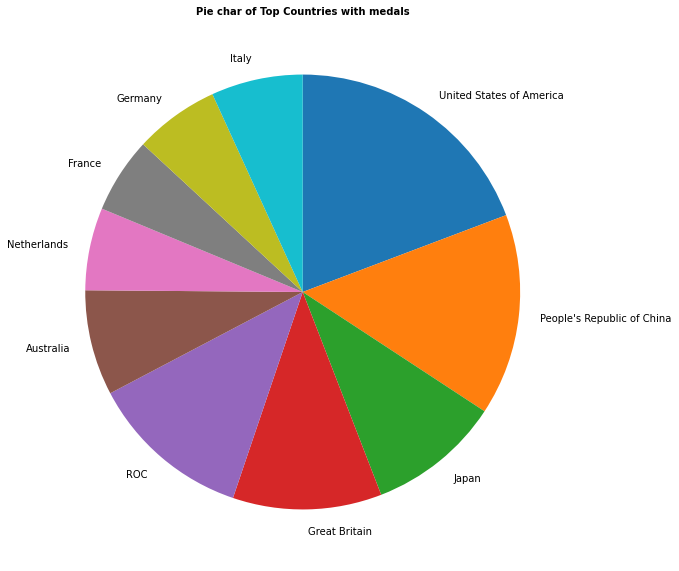

In [ ]:
figure = plt.figure(figsize=(30,10))
plt.pie(data_medals['Total'][:10], 
             labels=data_medals['Team/NOC'][:10], 
             startangle=90,
             labeldistance=1.10,pctdistance=0.8, counterclock=False)

plt.title("Pie char of Top Countries with medals", size=10, weight='bold')
plt.show()

In [ ]:
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(
    df, x="flipper_length_mm", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)